In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
data = pd.read_csv("Training_Data_Set.csv")

In [3]:
data.head(10)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50
5,25006,skoda,octavia,Chennai,12015.0,First,2015,4,1968,110.0,NaN,4,man,4,5,diesel,1543728.75
6,25007,skoda,superb,Coimbatore,181000.0,Fourth & Above,2009,10,1968,125.0,NaN,6,auto,5,5,diesel,915985.50
7,25008,fiat,panda,Chennai,33100.0,Second,2010,9,1108,40.0,NaN,5,man,5,5,petrol,327535.50
8,25009,nissan,qashqai,Coimbatore,17375.0,First,2015,4,1600,96.0,NaN,5,man,4,5,diesel,1361480.25
9,25010,skoda,superb,Mumbai,97640.0,Fourth & Above,2010,9,2000,103.0,NaN,6,man,5,5,diesel,885455.25


In [4]:
df = data.drop(['Maker','model','Location','Owner Type','body_type','door_count','seat_count'], axis=1)

In [5]:
df.head(10)

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type,Price
0,25001,NaN,1964,55,1964,147.0,8,man,petrol,543764.25
1,25002,27750.0,2012,7,1242,51.0,6,man,petrol,401819.25
2,25003,46000.0,2014,5,1995,105.0,7,auto,diesel,2392855.50
3,25004,43949.0,2011,8,1618,140.0,7,man,petrol,958606.50
4,25005,59524.0,2012,7,2993,180.0,7,auto,diesel,3085561.50
5,25006,12015.0,2015,4,1968,110.0,4,man,diesel,1543728.75
6,25007,181000.0,2009,10,1968,125.0,6,auto,diesel,915985.50
7,25008,33100.0,2010,9,1108,40.0,5,man,petrol,327535.50
8,25009,17375.0,2015,4,1600,96.0,5,man,diesel,1361480.25
9,25010,97640.0,2010,9,2000,103.0,6,man,diesel,885455.25


In [8]:
df = pd.get_dummies(df, columns=['transmission','fuel_type'])

In [10]:
df.head()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,transmission_auto,transmission_man,fuel_type_diesel,fuel_type_petrol
0,25001,NaN,1964,55,1964,147.0,8,543764.25,0,1,0,1
1,25002,27750.0,2012,7,1242,51.0,6,401819.25,0,1,0,1
2,25003,46000.0,2014,5,1995,105.0,7,2392855.50,1,0,1,0
3,25004,43949.0,2011,8,1618,140.0,7,958606.50,0,1,0,1
4,25005,59524.0,2012,7,2993,180.0,7,3085561.50,1,0,1,0


In [11]:
df.isna().sum()

Id                        0
Distance               1211
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
Price                     0
transmission_auto         0
transmission_man          0
fuel_type_diesel          0
fuel_type_petrol          0
dtype: int64

In [16]:
df.dtypes

Id                       int64
Distance               float64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
Price                  float64
transmission_auto        uint8
transmission_man         uint8
fuel_type_diesel         uint8
fuel_type_petrol         uint8
dtype: object

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,53515.0,5.175800e+04,15448.594165,25001.0,38379.50,51758.00,65136.500,78515.00
Distance,52304.0,9.454626e+04,275561.716141,0.0,15490.00,65520.00,135641.000,9899800.00
manufacture_year,53515.0,2.010408e+03,4.650322,1934.0,2008.00,2011.00,2014.000,2016.00
Age of car,53515.0,8.591890e+00,4.650322,3.0,5.00,8.00,11.000,85.00
engine_displacement,53515.0,1.904049e+03,1496.564596,14.0,1395.00,1896.00,1995.000,32000.00
engine_power,52076.0,1.004483e+02,45.330622,10.0,73.00,91.00,125.000,896.00
Vroom Audit Rating,53515.0,5.998374e+00,1.418336,4.0,5.00,6.00,7.000,8.00
Price,53515.0,1.098084e+06,844156.530729,3.0,505181.25,885455.25,1477828.875,22120775.25
transmission_auto,53515.0,3.135756e-01,0.463950,0.0,0.00,0.00,1.000,1.00
transmission_man,53515.0,6.864244e-01,0.463950,0.0,0.00,1.00,1.000,1.00


In [23]:
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

In [24]:
df.head()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,transmission_auto,transmission_man,fuel_type_diesel,fuel_type_petrol
0,25001,65520.0,1964,55,1964,147.0,8,543764.25,0,1,0,1
1,25002,27750.0,2012,7,1242,51.0,6,401819.25,0,1,0,1
2,25003,46000.0,2014,5,1995,105.0,7,2392855.50,1,0,1,0
3,25004,43949.0,2011,8,1618,140.0,7,958606.50,0,1,0,1
4,25005,59524.0,2012,7,2993,180.0,7,3085561.50,1,0,1,0


In [25]:
df.isna().sum()

Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
Price                  0
transmission_auto      0
transmission_man       0
fuel_type_diesel       0
fuel_type_petrol       0
dtype: int64

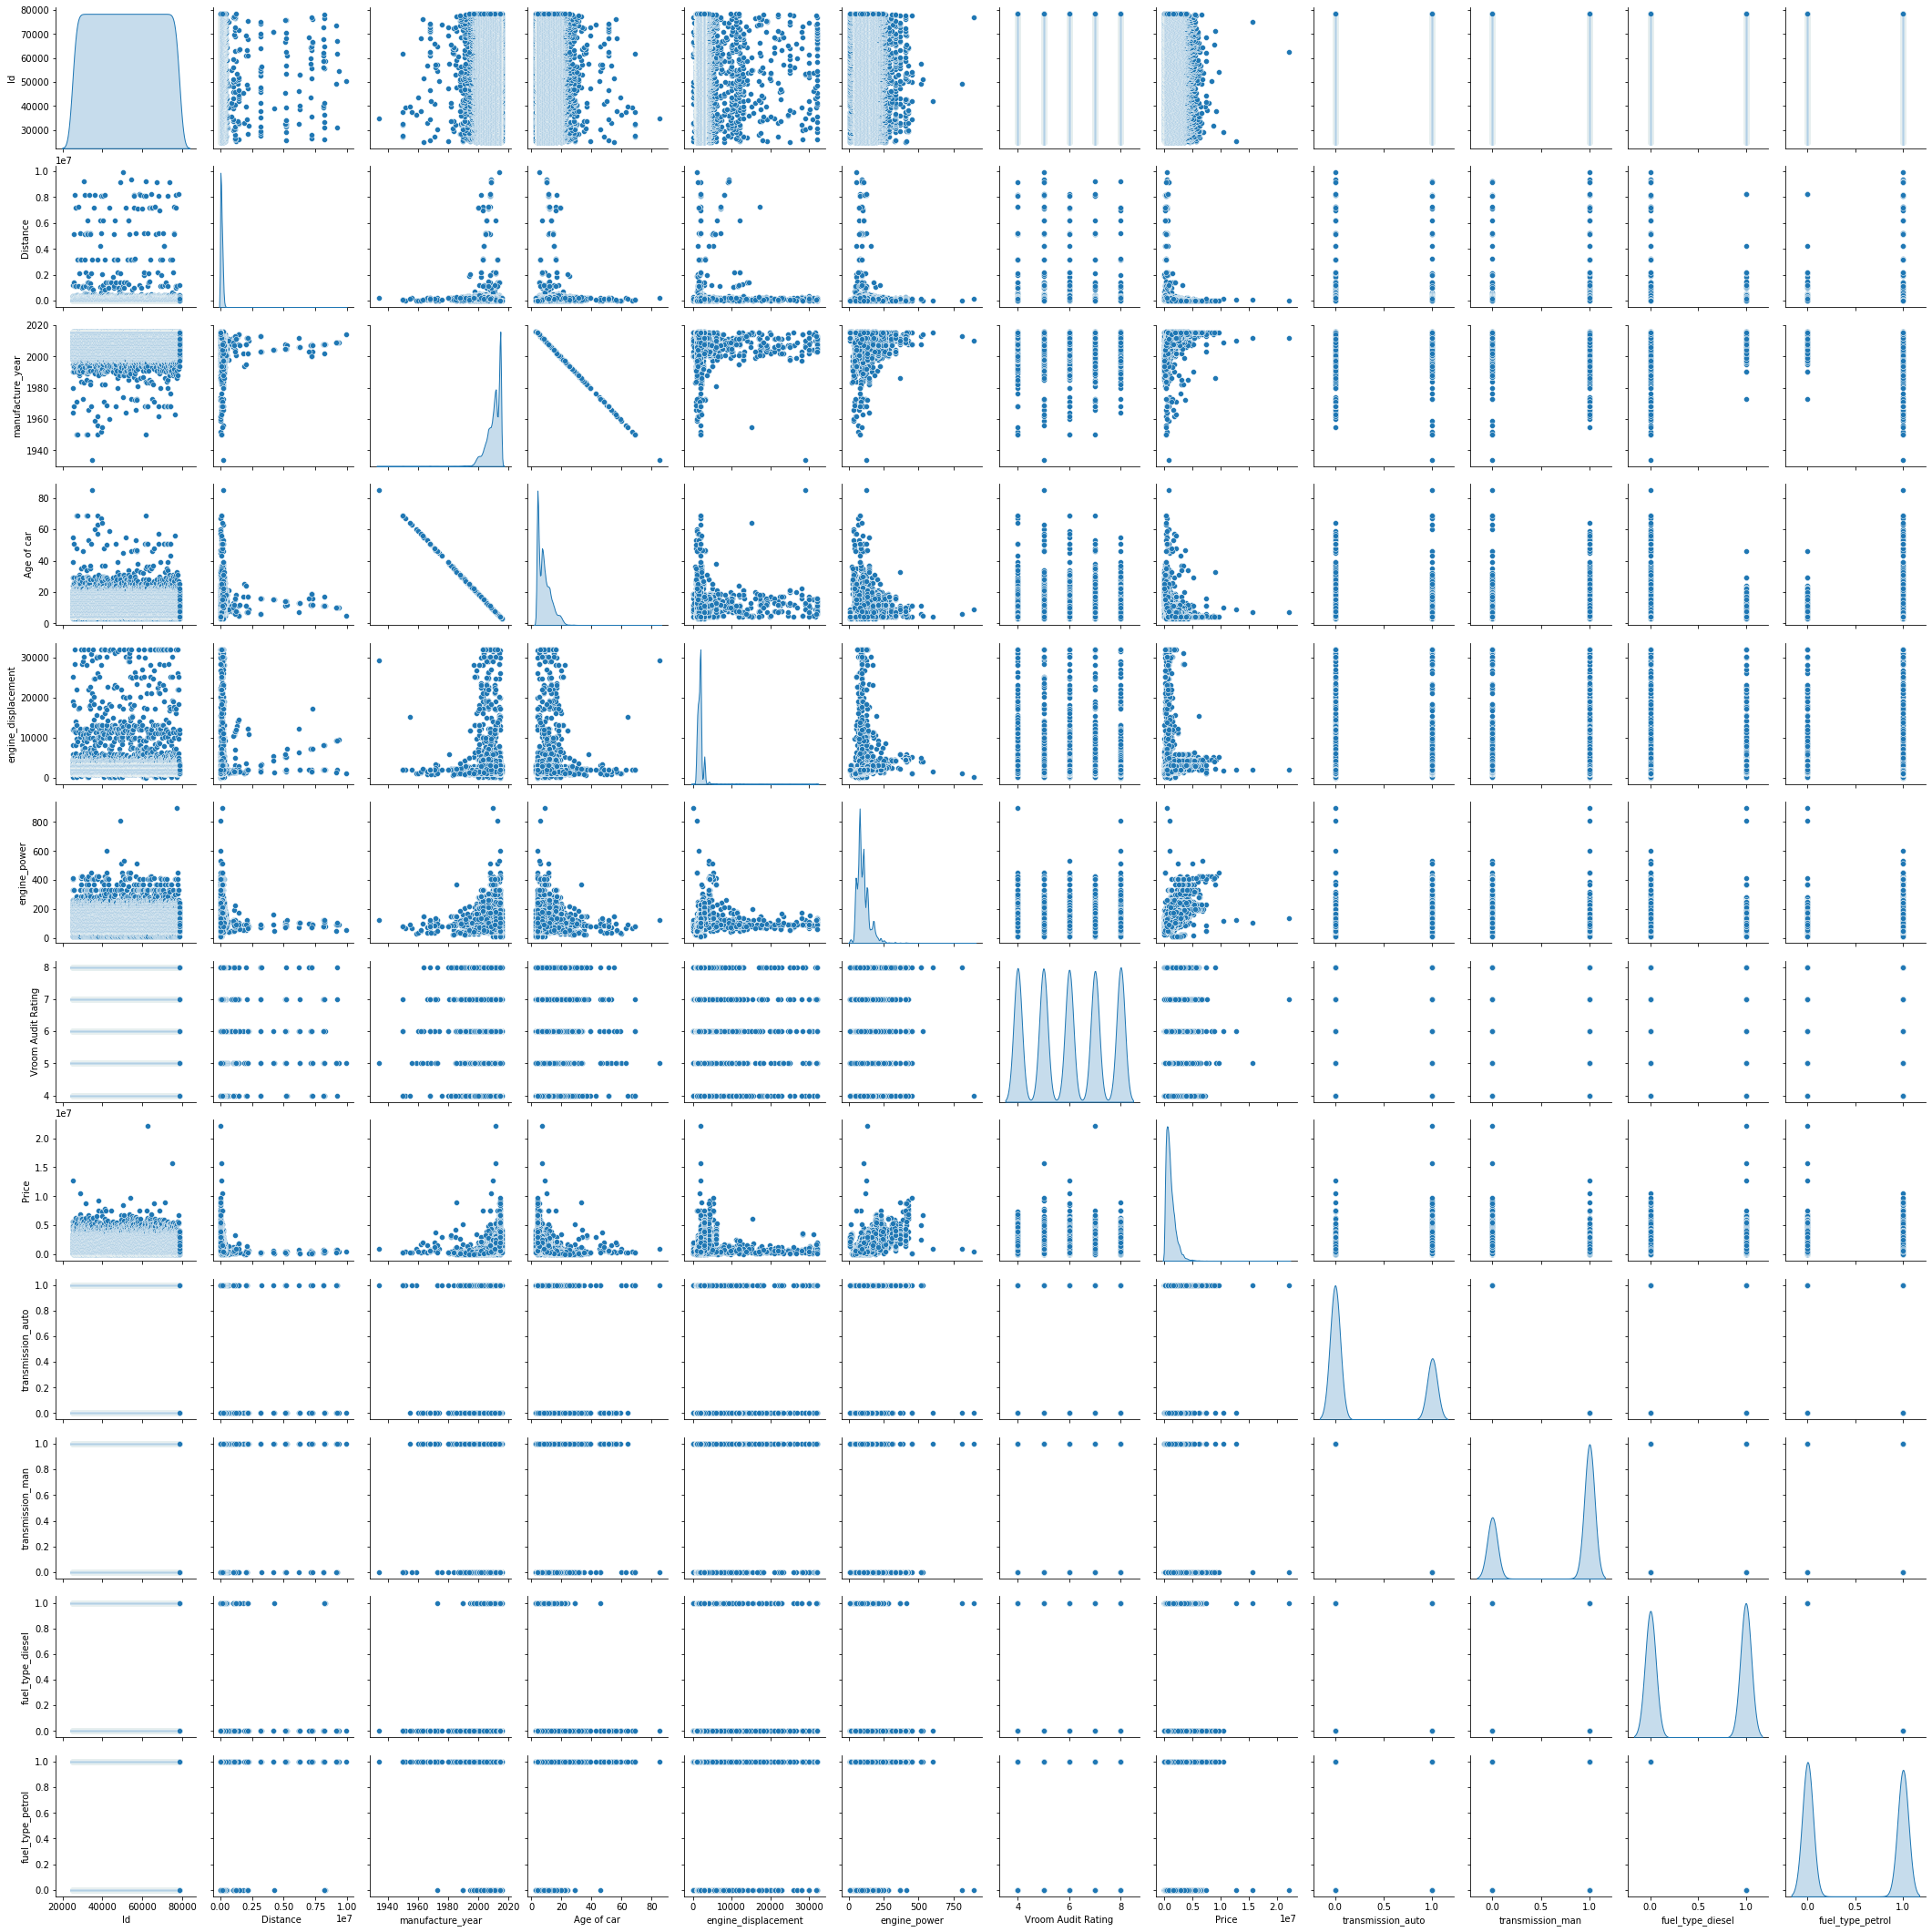

In [26]:
sns.pairplot(df, diag_kind='kde')

In [28]:
X = df.drop('Price', axis=1)
y = df[['Price']]

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [167]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [168]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Id is 0.029493659292534665
The coefficient for Distance  is -0.1970486670022511
The coefficient for manufacture_year is 39885.26047707485
The coefficient for Age of car is -39885.260477074764
The coefficient for engine_displacement is 5.589408687596708
The coefficient for engine_power is 9104.050253808111
The coefficient for Vroom Audit Rating is 1861.133668380209
The coefficient for transmission_auto is 160590.47036748272
The coefficient for transmission_man is -160590.47036748266
The coefficient for fuel_type_diesel is 79355.09493172285
The coefficient for fuel_type_petrol is -79355.09493172282


In [169]:
intercept = regression_model.intercept_[0]
print(intercept)

-79604244.01032272


In [170]:
regression_model.score(X_test, y_test)

0.6620409530070954

In [171]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)

#print(y_pred)

print(poly_clf.score(X_test_, y_test))

0.7916719443941284


In [172]:
print(X.shape)
print(X_train_.shape)

(53515, 11)
(42812, 67)


In [173]:
poly

PolynomialFeatures(interaction_only=True)

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [176]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

C:\Users\arshk\AppData\Local\Temp/ipykernel_18284/372932812.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.9244436522609485

In [177]:
rf.score(X_train, y_train)

0.9848843585126847

In [178]:
r2_score(y_test, y_pred)

0.9244436522609485

In [63]:
df_t = pd.read_csv('Test_Data_Set.csv')

In [64]:
df_t.head(10)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol
5,11006,audi,tt,Delhi,3000.0,Third,2015,4,1968,135.0,NaN,8,man,2,2,diesel
6,11007,bmw,x3,Chennai,10.0,Fourth & Above,2015,4,2979,20.0,NaN,5,auto,None,5,petrol
7,11008,audi,q3,Bangalore,18000.0,Third,2014,5,1968,130.0,NaN,6,auto,4,5,diesel
8,11009,skoda,octavia,Bangalore,270.0,Fourth & Above,2006,13,2000,103.0,compact,5,man,None,None,petrol
9,11010,toyota,auris,Delhi,3000.0,Third,2015,4,1197,85.0,NaN,5,man,4,5,petrol


In [65]:
df_test = df_t.drop(['Maker','model','Location','Owner Type','body_type','door_count','seat_count'], axis=1)

In [66]:
df_test.head(10)

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type
0,11001,150000.0,2007,12,1595,75.0,5,man,petrol
1,11002,29376.0,2014,5,1598,77.0,4,man,diesel
2,11003,30563.0,2014,5,1968,110.0,5,man,diesel
3,11004,8650.0,2015,4,1968,110.0,8,auto,diesel
4,11005,6400.0,2015,4,1984,169.0,4,auto,petrol
5,11006,3000.0,2015,4,1968,135.0,8,man,diesel
6,11007,10.0,2015,4,2979,20.0,5,auto,petrol
7,11008,18000.0,2014,5,1968,130.0,6,auto,diesel
8,11009,270.0,2006,13,2000,103.0,5,man,petrol
9,11010,3000.0,2015,4,1197,85.0,5,man,petrol


In [67]:
df_test.isna().sum()

Id                       0
Distance               128
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           168
Vroom Audit Rating       0
transmission             0
fuel_type                0
dtype: int64

In [68]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,5615.0,13808.000000,1621.055212,11001.0,12404.5,13808.0,15211.5,16615.0
Distance,5487.0,95890.088573,308854.678665,0.0,14410.0,64000.0,133849.0,9143000.0
manufacture_year,5615.0,2010.487622,4.737177,1950.0,2008.0,2012.0,2014.0,2016.0
Age of car,5615.0,8.512378,4.737177,3.0,5.0,7.0,11.0,69.0
engine_displacement,5615.0,1875.839003,1402.871783,100.0,1390.0,1798.0,1984.0,32000.0
engine_power,5447.0,99.474573,45.483800,10.0,73.0,88.0,125.0,968.0
Vroom Audit Rating,5615.0,5.995370,1.399010,4.0,5.0,6.0,7.0,8.0


In [70]:
df_test = pd.get_dummies(df_test, columns=['transmission','fuel_type'])

In [71]:
df_test = df_test.apply(lambda x: x.fillna(x.median()),axis=0)

In [72]:
df_test.head()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission_auto,transmission_man,fuel_type_diesel,fuel_type_petrol
0,11001,150000.0,2007,12,1595,75.0,5,0,1,0,1
1,11002,29376.0,2014,5,1598,77.0,4,0,1,1,0
2,11003,30563.0,2014,5,1968,110.0,5,0,1,1,0
3,11004,8650.0,2015,4,1968,110.0,8,1,0,1,0
4,11005,6400.0,2015,4,1984,169.0,4,1,0,0,1


In [73]:
df_test.isna().sum()

Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission_auto      0
transmission_man       0
fuel_type_diesel       0
fuel_type_petrol       0
dtype: int64

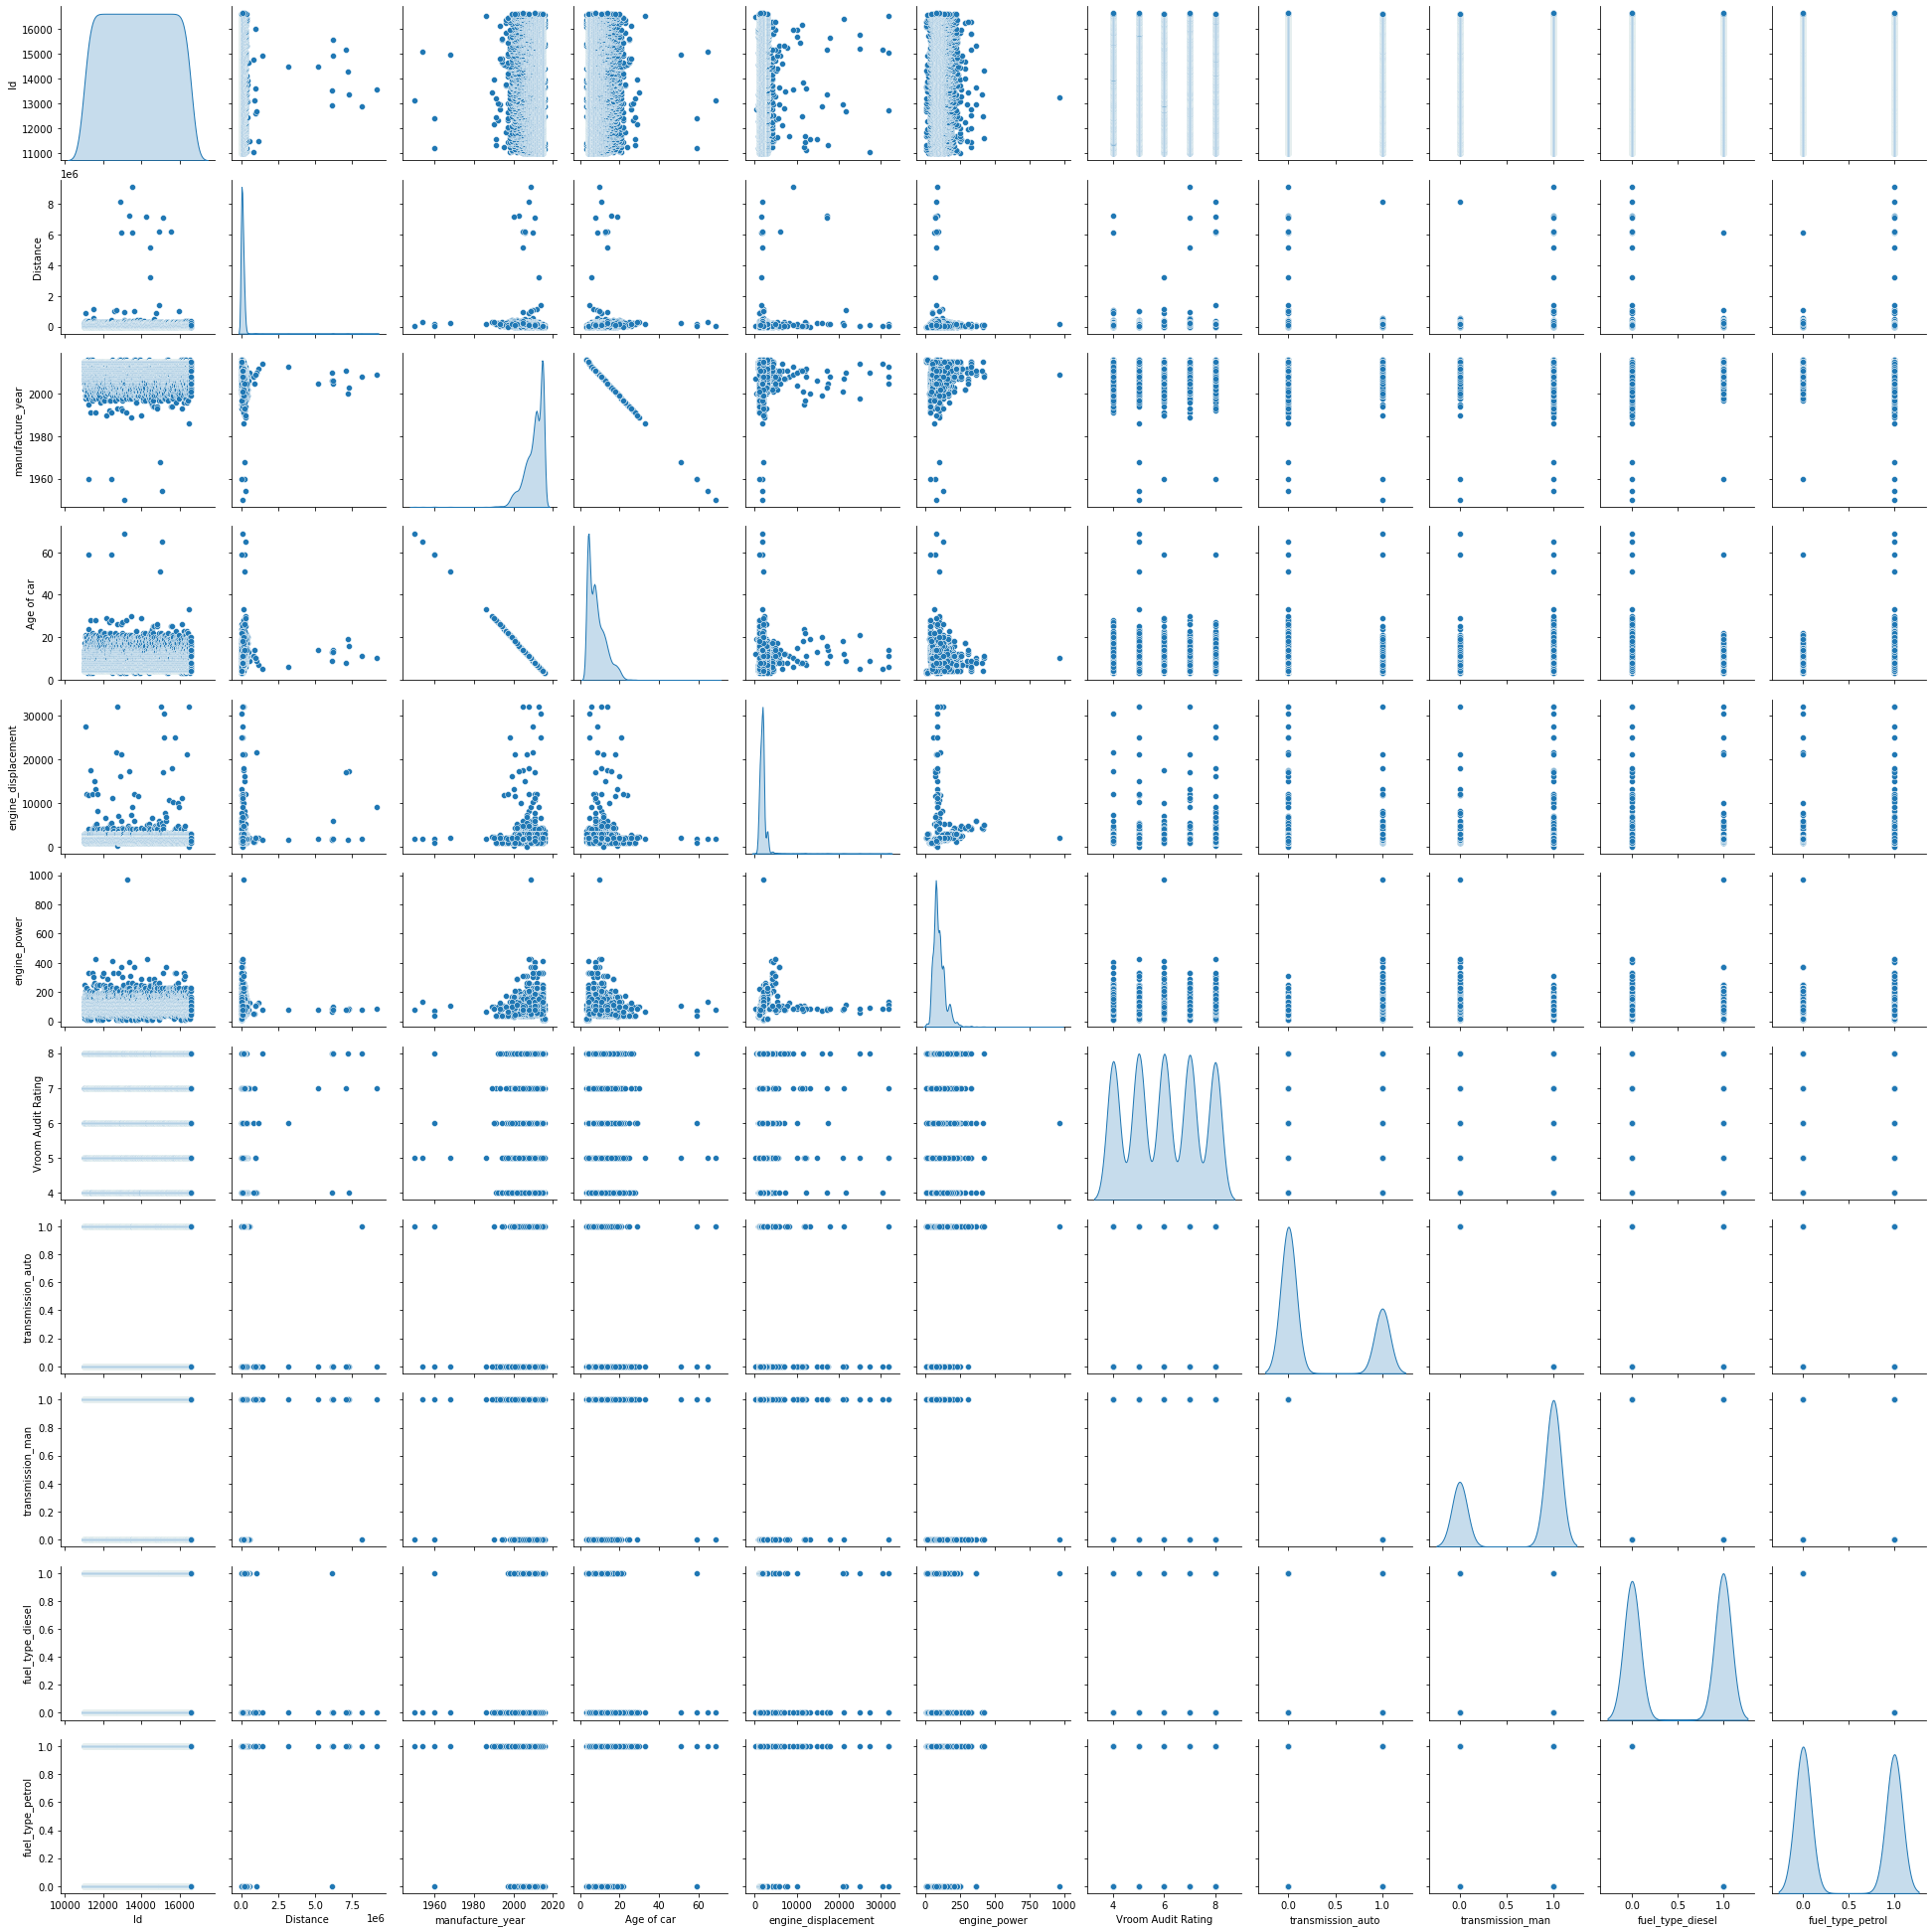

In [74]:
sns.pairplot(df_test, diag_kind='kde')

In [79]:
p_test = poly.fit_transform(df_test)

In [80]:
p_pred = poly_clf.predict(p_test)

In [81]:
print(p_pred)

[[ 444441.29070473]
 [1226697.94909096]
 [1636097.13305187]
 ...
 [ 255892.66407776]
 [ 962629.63071823]
 [ 747131.66126537]]


In [84]:
p_pred.shape

(5615, 1)

In [144]:
ran = rf.predict(df_test)

In [145]:
ran.shape

(5615,)

In [146]:
ran

array([ 356922.285 , 1160053.8825, 1505433.54  , ...,  375175.14  ,
       1085485.89  ,  562448.82  ])

In [147]:
result = pd.DataFrame().assign(Id=df_test['Id'], Price= ran)

In [148]:
result

,Id,Price
0,11001,3.569223e+05
1,11002,1.160054e+06
2,11003,1.505434e+06
3,11004,2.205669e+06
4,11005,2.817172e+06
...,...,...
5610,16611,8.801226e+05
5611,16612,2.797467e+05
5612,16613,3.751751e+05
5613,16614,1.085486e+06


In [134]:
result.to_csv("Test3.csv")

In [149]:
from sklearn.neighbors import KNeighborsRegressor